In [1]:
def cropImage(r,img): #crops image for given coordinate
    imgCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
    return imgCrop

def resizeImage(scale_percent,img): # resizes image
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    return resized
    

def show(show_img): #displays image
    cv2.imshow("Image", show_img) 
    cv2.waitKey(0)




In [2]:
import numpy as np

import datetime
import cv2

import pandas as pd
import os, os.path
import re
from sklearn.model_selection import train_test_split
import pylab as pl

import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Method 1

In [3]:

METH_1_DATAPATH_1 = r"./Data_Breast_Cancer/meth1/1/" # DataSet path for method1 sick images. "1" is for sick
filenames = os.listdir(METH_1_DATAPATH_1) # list files in that directory
#filenames.remove('.ipynb_checkpoints')

col = [x for x in range(173600)]  #total number of pixels 560*310= 173600.
Data1 = pd.DataFrame(columns=col)
i = 0
for filename in filenames:
    img  = cv2.imread(METH_1_DATAPATH_1+str(filename)) #read image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
    crop = cropImage((35, 98, 560, 310),gray) #crop image
    row =  crop.ravel()  #flatten
    row_as_list = row.tolist()
    Data1.loc[i] = row_as_list #insert in the dataframe
    i=i+1



In [4]:
Data1.insert(0, "label", [1, 1, 1, 1, 1], True) #insert label "1" for sick images
Data1.head()

,label,0,1,2,3,4,5,6,7,8,...,173590,173591,173592,173593,173594,173595,173596,173597,173598,173599
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
METH_1_DATAPATH_0 = r"./Data_Breast_Cancer/meth1/0/" #data path for method 1 healthy images, 0 means healthy
filenames = os.listdir(METH_1_DATAPATH_0) #list of files in the directory
filenames.remove('.ipynb_checkpoints')

col = [x for x in range(173600)] #total number of pixels = 560*310= 173600
Data0 = pd.DataFrame(columns=col)
i = 0
for filename in filenames:
    img  = cv2.imread(METH_1_DATAPATH_0+str(filename)) #read file
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
    crop = cropImage((35, 98, 560, 310),gray) #crop image
    row =  crop.ravel() #flatten
    row_as_list = row.tolist()
    Data0.loc[i] = row_as_list #store in dataset
    i=i+1

In [6]:

Data0.insert(0, "label", [0, 0, 0, 0, 0], True) #insert label "0" for healthy images
Data0.head()

,label,0,1,2,3,4,5,6,7,8,...,173590,173591,173592,173593,173594,173595,173596,173597,173598,173599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#merge Data0 and Data1
frames = frames = [Data0, Data1]
meth1_df = pd.concat(frames,ignore_index=True) #method  1 dataset, that has healthy and sick images
meth1_df.head(10)

,label,0,1,2,3,4,5,6,7,8,...,173590,173591,173592,173593,173594,173595,173596,173597,173598,173599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:

meth1_df = meth1_df.astype('int64') #convert the values to int64
meth1_df.dtypes

label     int64
0         int64
1         int64
2         int64
3         int64
4         int64
5         int64
6         int64
7         int64
8         int64
9         int64
10        int64
11        int64
12        int64
13        int64
14        int64
15        int64
16        int64
17        int64
18        int64
19        int64
20        int64
21        int64
22        int64
23        int64
24        int64
25        int64
26        int64
27        int64
28        int64
          ...  
173570    int64
173571    int64
173572    int64
173573    int64
173574    int64
173575    int64
173576    int64
173577    int64
173578    int64
173579    int64
173580    int64
173581    int64
173582    int64
173583    int64
173584    int64
173585    int64
173586    int64
173587    int64
173588    int64
173589    int64
173590    int64
173591    int64
173592    int64
173593    int64
173594    int64
173595    int64
173596    int64
173597    int64
173598    int64
173599    int64
Length: 173601, dtype: o

In [9]:
X1 = meth1_df.drop('label', 1).astype('float32') #drop label
X1 = np.asarray(X1)
print(X1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
Y1 = np.asarray(meth1_df['label']) #store label
print(Y1)

[0 0 0 0 0 1 1 1 1 1]


In [11]:
from sklearn import svm
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, Y1, test_size=0.2, random_state=4) #trai,test,split
clf1 = svm.SVC(kernel='rbf') #Svm kernel for rbf
clf1.fit(X_train1, y_train1) #train model

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
yhat1 = clf1.predict(X1) #predict
print(yhat1)

[0 0 0 1 0 1 1 1 1 1]


In [13]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y1,yhat1)
print("METHOD 1")
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
#####from confusion matrix calculate sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
#####from confusion matrix calculate specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

METHOD 1
Accuracy :  0.9
Sensitivity :  0.8
Specificity :  1.0


# Visualization

### Method1 - Healthy Images

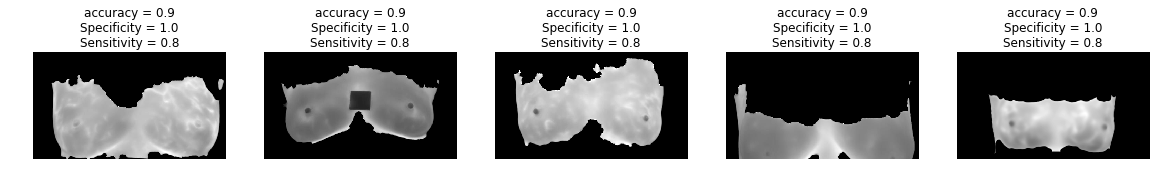

In [14]:
# visualise some labels
f, axarr = plt.subplots(1,5, figsize=(20,20))
for i in range(5):
    image = X1[i].reshape(310,560)
    axarr[i].axis('off')
    axarr[i].set_title("accuracy = " + str(accuracy1) + "\nSpecificity = " + str(specificity1) + "\nSensitivity = " + str(sensitivity1))
    axarr[i].imshow(image, cmap='gray')

# Visualization
### Method1 - Sick Images

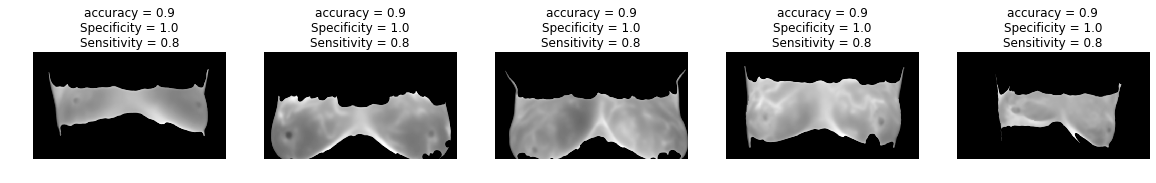

In [22]:
# visualise some labels
f, axarr = plt.subplots(1,5, figsize=(20,20))
j=5
for i in range(5):
    image = X1[j].reshape(310,560)
    axarr[i].axis('off')
    axarr[i].set_title("accuracy = " + str(accuracy1) + "\nSpecificity = " + str(specificity1) + "\nSensitivity = " + str(sensitivity1))
    axarr[i].imshow(image, cmap='gray')
    j=j+1

# Method 2

In [24]:
METH_2_DATAPATH_1 = r"./Data_Breast_Cancer/meth2/1/"
filenames = os.listdir(METH_2_DATAPATH_1)
#filenames.remove('.ipynb_checkpoints')

col = [x for x in range(173600)]
Data21 = pd.DataFrame(columns=col)
i = 0
for filename in filenames:
    img  = cv2.imread(METH_2_DATAPATH_1+str(filename))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    crop = cropImage((35, 98, 560, 310),gray)
    row =  crop.ravel()
    row_as_list = row.tolist()
    Data21.loc[i] = row_as_list
    i=i+1

In [25]:
Data21.insert(0, "label", [1, 1, 1, 1, 1], True)
Data21.head()

,label,0,1,2,3,4,5,6,7,8,...,173590,173591,173592,173593,173594,173595,173596,173597,173598,173599
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
METH_2_DATAPATH_0 = r"./Data_Breast_Cancer/meth2/0/"  #data  fro method 2 healthy images, 0 is for healthy
filenames = os.listdir(METH_2_DATAPATH_0)
#filenames.remove('.ipynb_checkpoints')

col = [x for x in range(173600)]
Data20 = pd.DataFrame(columns=col)
i = 0                                                 ##### perform same operations as method 1 #####
for filename in filenames:
    img  = cv2.imread(METH_2_DATAPATH_0+str(filename))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    crop = cropImage((35, 98, 560, 310),gray)
    row =  crop.ravel()
    row_as_list = row.tolist()
    Data20.loc[i] = row_as_list
    i=i+1

In [27]:
Data20.insert(0, "label", [0, 0, 0, 0, 0], True)     ##### perform same operations as method 1 #####
Data20.head()

,label,0,1,2,3,4,5,6,7,8,...,173590,173591,173592,173593,173594,173595,173596,173597,173598,173599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#merge Data0 and Data1
frames = frames = [Data20, Data21]
meth2_df = pd.concat(frames,ignore_index=True)         ##### perform same operations as method 1 #####
meth2_df.head(10)

,label,0,1,2,3,4,5,6,7,8,...,173590,173591,173592,173593,173594,173595,173596,173597,173598,173599
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
meth2_df = meth2_df.astype('int64')       ##### perform same operations as method 1 #####
meth2_df.dtypes

label     int64
0         int64
1         int64
2         int64
3         int64
4         int64
5         int64
6         int64
7         int64
8         int64
9         int64
10        int64
11        int64
12        int64
13        int64
14        int64
15        int64
16        int64
17        int64
18        int64
19        int64
20        int64
21        int64
22        int64
23        int64
24        int64
25        int64
26        int64
27        int64
28        int64
          ...  
173570    int64
173571    int64
173572    int64
173573    int64
173574    int64
173575    int64
173576    int64
173577    int64
173578    int64
173579    int64
173580    int64
173581    int64
173582    int64
173583    int64
173584    int64
173585    int64
173586    int64
173587    int64
173588    int64
173589    int64
173590    int64
173591    int64
173592    int64
173593    int64
173594    int64
173595    int64
173596    int64
173597    int64
173598    int64
173599    int64
Length: 173601, dtype: o

In [29]:
X2 = meth2_df.drop('label', 1).astype('float32')
X2 = np.asarray(X2)                   ##### perform same operations as method 1 #####
print(X2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
Y2 = np.asarray(meth2_df['label'])     ##### perform same operations as method 1 #####
print(Y2)

[0 0 0 0 0 1 1 1 1 1]


In [31]:

clf2 = svm.SVC(kernel='rbf')       ##### perform same operations as method 1 #####
clf2.fit(X2, Y2) 

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
yhat2 = clf2.predict(X2)
print(yhat2)                       ##### perform same operations as method 1 #####

[0 0 0 0 0 1 1 1 1 1]


In [33]:
from sklearn.metrics import confusion_matrix     ##### perform same operations as method 1 #####

cm2 = confusion_matrix(Y2,yhat2)
print("METHOD 2")
total2=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm1[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

METHOD 2
Accuracy :  1.0
Sensitivity :  0.8
Specificity :  1.0


# Visualization
### Method 1 - Healthy Images

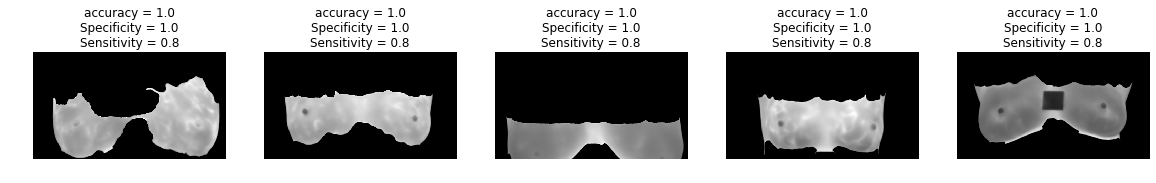

In [34]:
# visualise some predicted labels
f, axarr = plt.subplots(1,5, figsize=(20,20))    ##### perform same operations as method 1 #####
for i in range(5):
    image = X2[i].reshape(310,560)
    axarr[i].axis('off')
    axarr[i].set_title("accuracy = " + str(accuracy2) + "\nSpecificity = " + str(specificity2) + "\nSensitivity = " + str(sensitivity2))
    axarr[i].imshow(image, cmap='gray')

# Visualization
### Method 1 - Sick Images

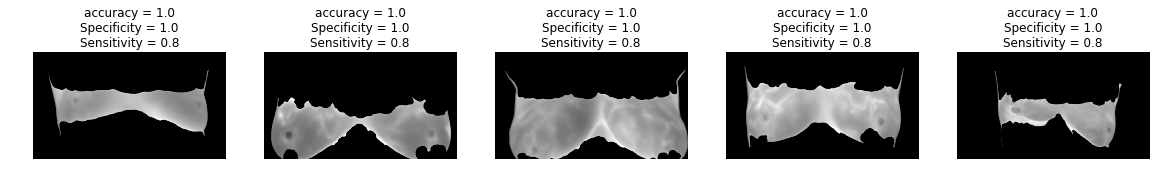

In [35]:
# visualise some labels
f, axarr = plt.subplots(1,5, figsize=(20,20))
j=5
for i in range(5):
    image = X2[j].reshape(310,560)
    axarr[i].axis('off')
    axarr[i].set_title("accuracy = " + str(accuracy2) + "\nSpecificity = " + str(specificity2) + "\nSensitivity = " + str(sensitivity2))
    axarr[i].imshow(image, cmap='gray')
    j=j+1